In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\ROHIT RAJAN\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Creating dataframe for numeric and categorical features separately 
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [7]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
numeric_df.shape

(1168, 38)

In [9]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### EDA on Numerical features

#### HeatMap

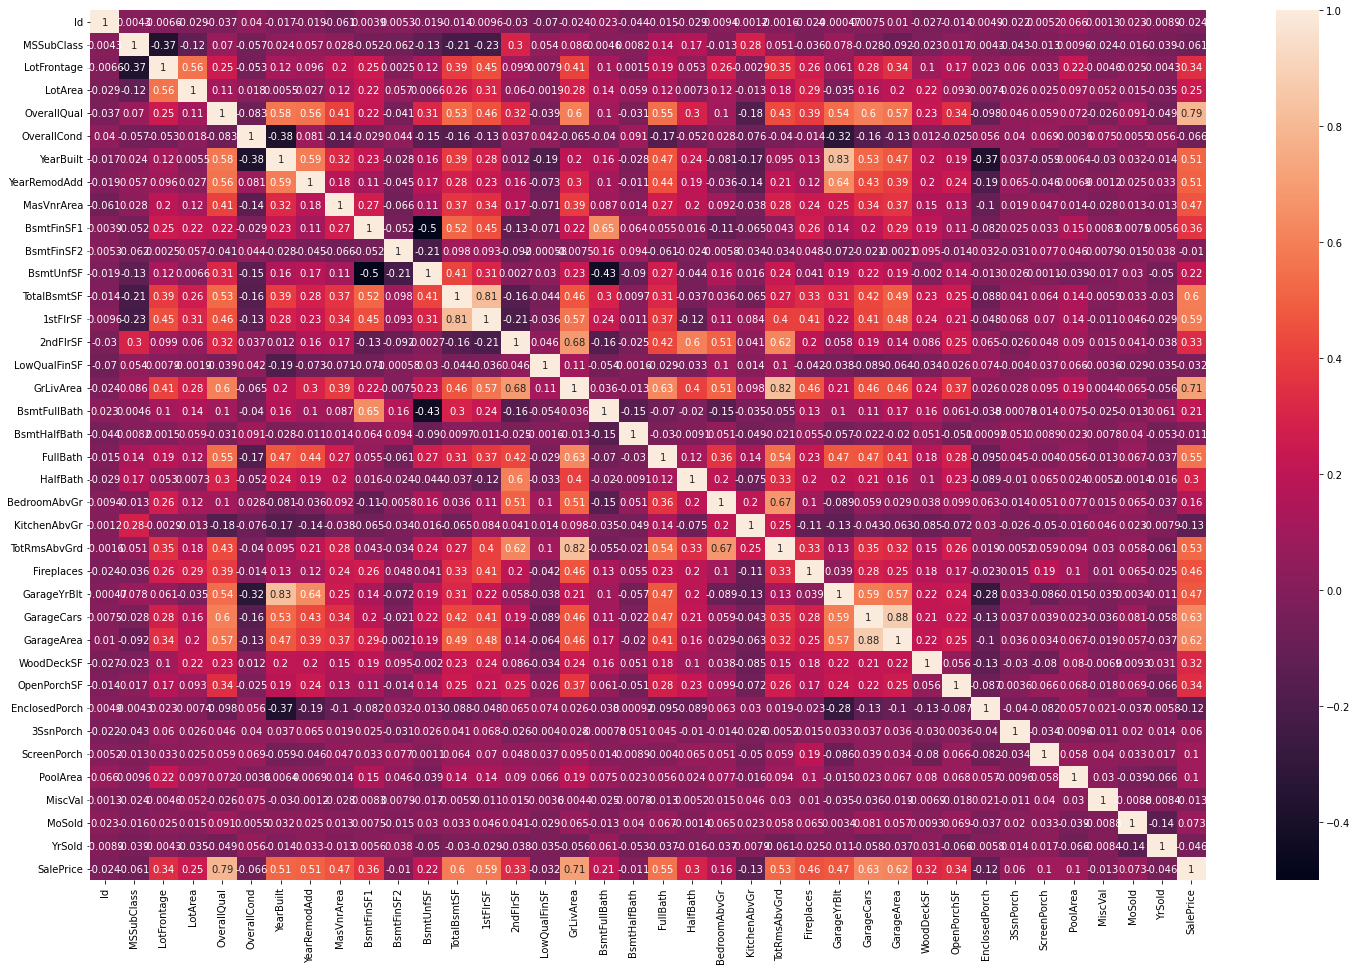

In [10]:
plt.figure(figsize=(25,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Information:

- Some features have high correlation with each other:
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)
- 1stflrSF and GrLivArea (0.69)
- TotRmsAbvGrd and BedroomAbvGrd (0.68)
- Will drop one feature from each of these pair data visualization.

### Univariate Analysis

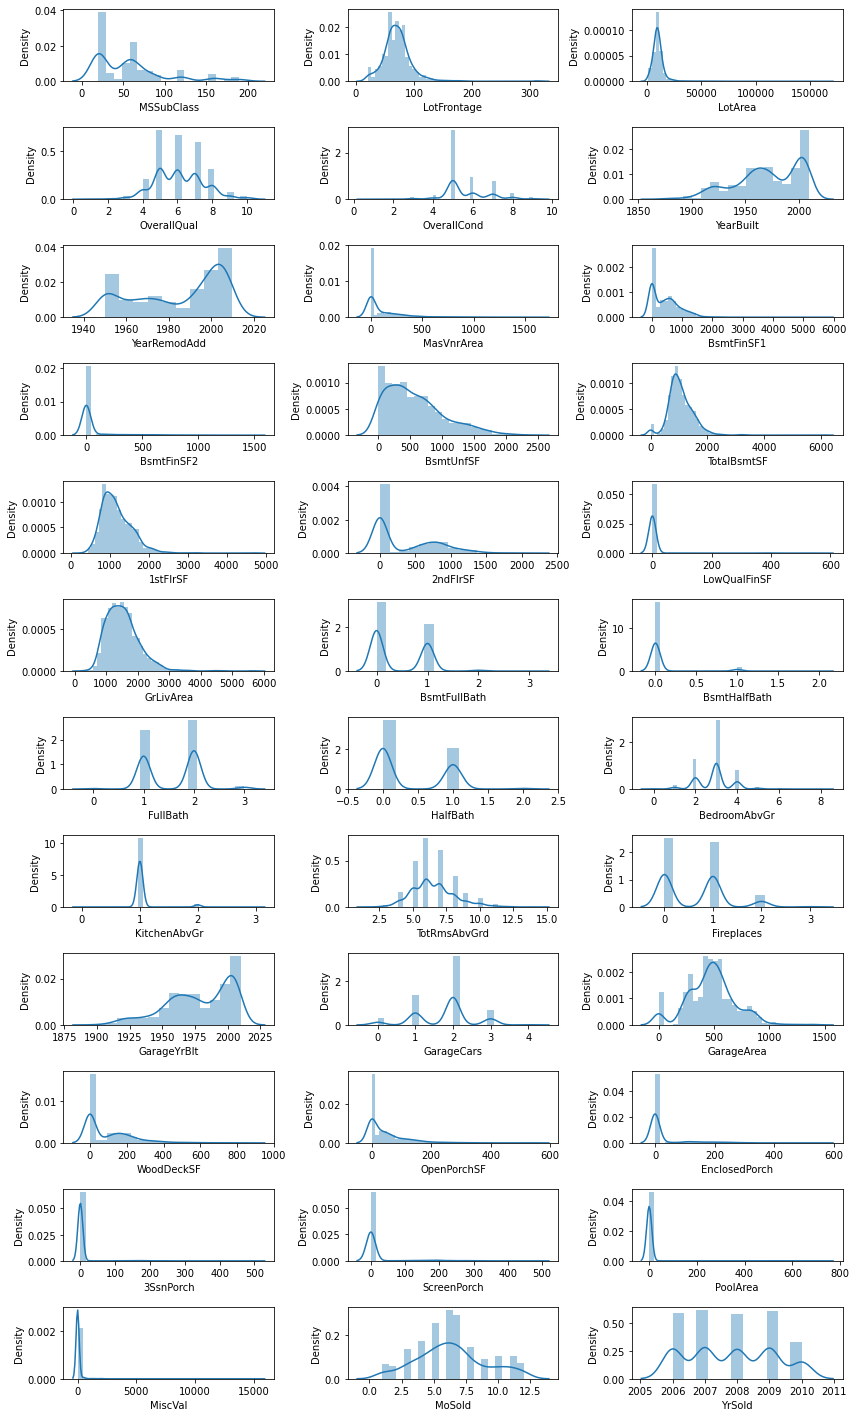

In [11]:
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(df[feature])
        plt.tight_layout()

Information:

- 'YearBuilt', 'OverallCond', 'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath', 'MoSold', 'Yrsold', 'BsmtQual', 'ExterCond','BsmtExposure', 'BsmtFinType2', 'TotRmsAbvGrd', 'GarageCond', 'GarageQual', 'KitchenAbvGr', 'LowQualFinSF', 'Fireplaces' are categorical.
- Some features have majority 1 unique values: BsmtFinSF2, LowQualFinSF, KitchenAbvGr, EnclosedPorch, PoolArea, ScreenPorch, 3SsnPorch, MiscVal. These will create class imbalance so better to remove after EDA.

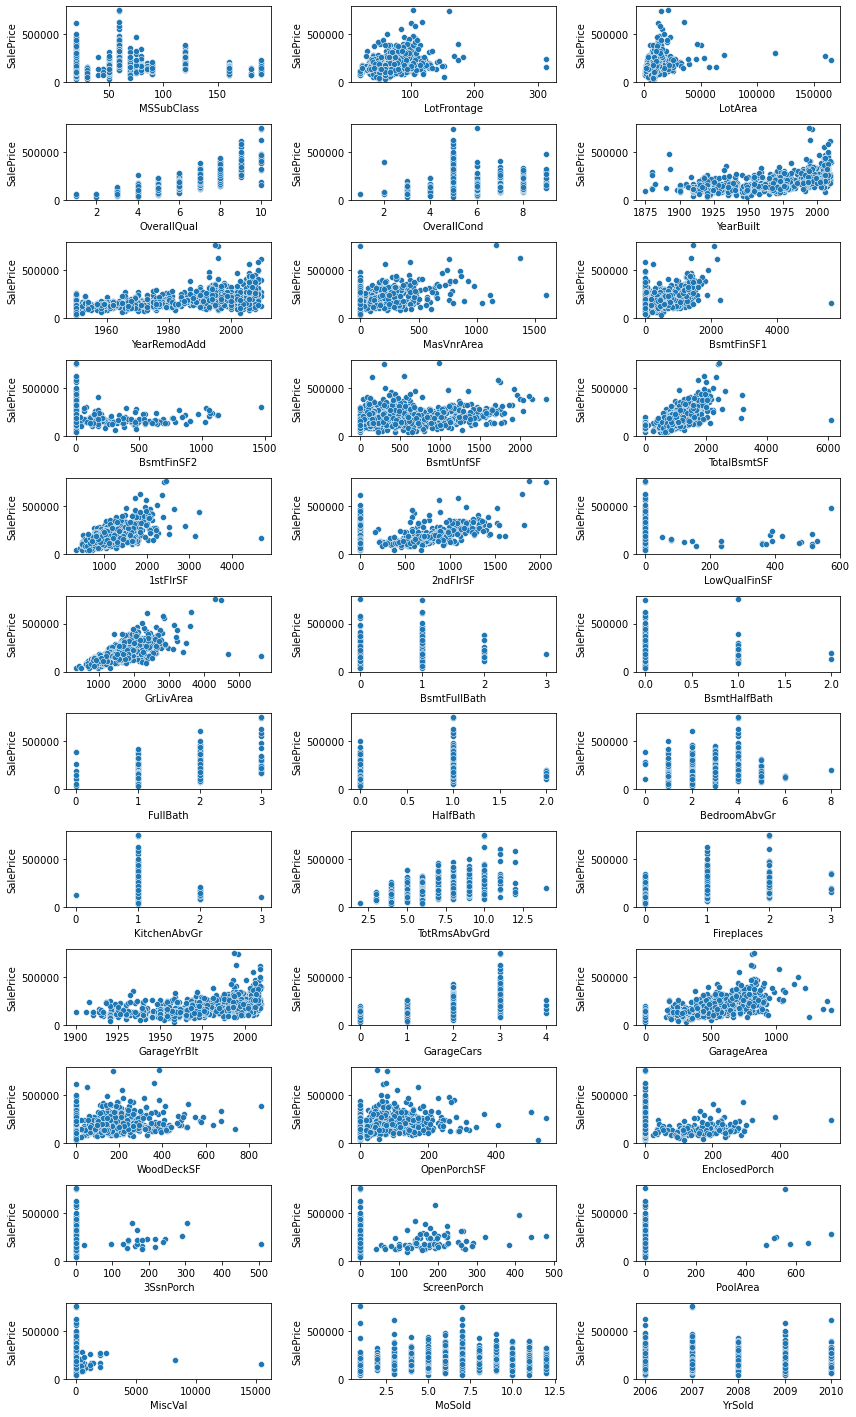

In [12]:
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.scatterplot(df[feature], df['SalePrice'])
        plt.tight_layout()

Information:

- Mix features continuous and discrete.
- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea' are showing positive correlation with SalePrice.
- MSSubClass, OverallQual, OverallCond, Bathroom related features, totalRoomsAbvGrd, MoSold, YrSold, GarageCars, KitchenAbvGrd has discrete values
- Year realted features also show a positive correlation with SalePrice.

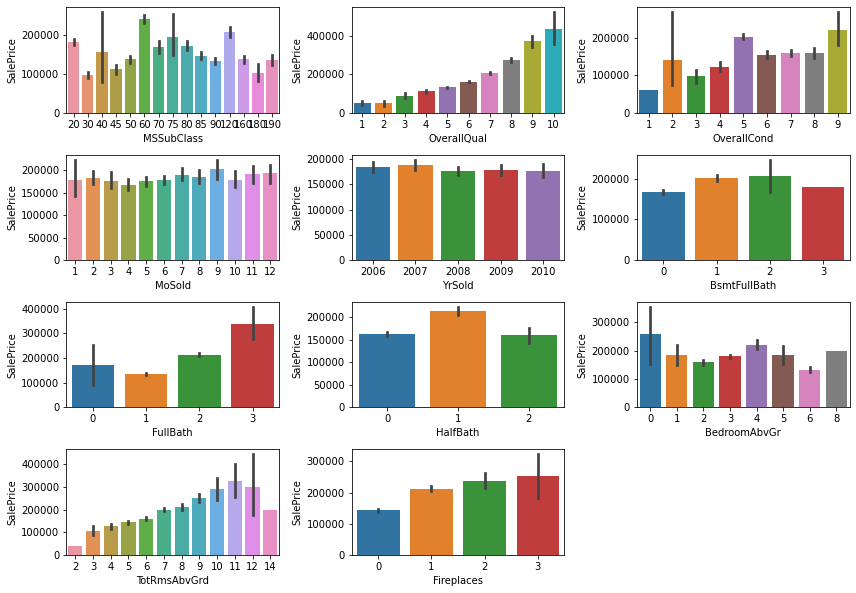

In [13]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']):
    plt.subplot(6, 3, i+1)
    sns.barplot(df[feature], df['SalePrice'])
    plt.tight_layout()

Information:

- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)
- 'OverallCond' : SalePrice is highest for rating 5
- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold
- 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice
- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price but after a certain value it decreases.

In [14]:
# Converting the year related features into number of years
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    df[feature] = 2022 - df[feature]

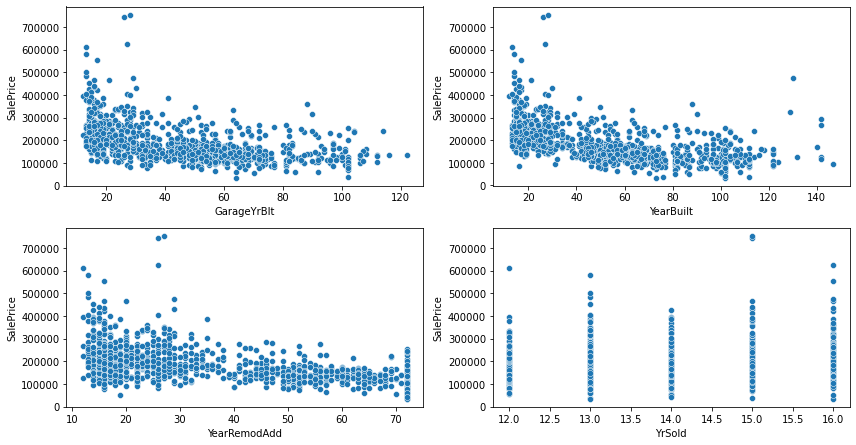

In [15]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(df[feature], df['SalePrice'])
    plt.tight_layout()

Information:

- For most the realty properties Garage is built within last 20-30 years, SalePrice is more for recently built garages
- SalePrice is more for recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice
- YrSold still does not show any significant trend

### EDA on Categorical columns

In [16]:
categorical_df.columns.sort_values()

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [17]:
# Dividing categorical features into sub classes
bsmt_df = categorical_df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual']]
garage_df = categorical_df[['GarageCond','GarageFinish', 'GarageQual', 'GarageType']]
sale_df = categorical_df[['SaleCondition', 'SaleType']]
exterior_df = categorical_df[['ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd']]
heating_df = categorical_df[['Heating', 'HeatingQC','Electrical','FireplaceQu']]
land_df = categorical_df[['LandContour', 'LandSlope', 'Street', 'Alley','PavedDrive', 'Fence']]

### Basement features

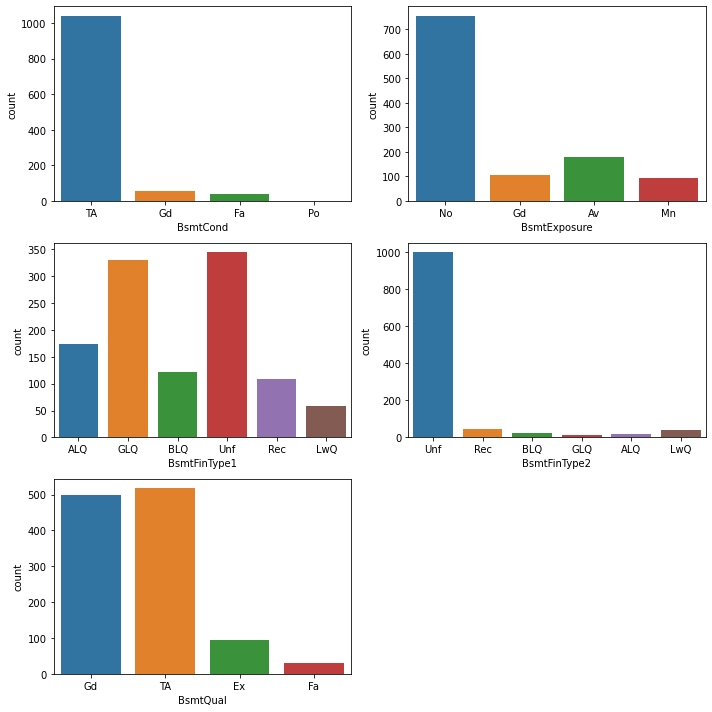

In [18]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(bsmt_df[col])
    plt.tight_layout()

Information:

- BsmtCond in most houses are average with no basement exposure.
- Most hauses have 1 Good/ unfurnished basemet with second one as unfurnished.
- Basement quality has been mostly equal or above average.

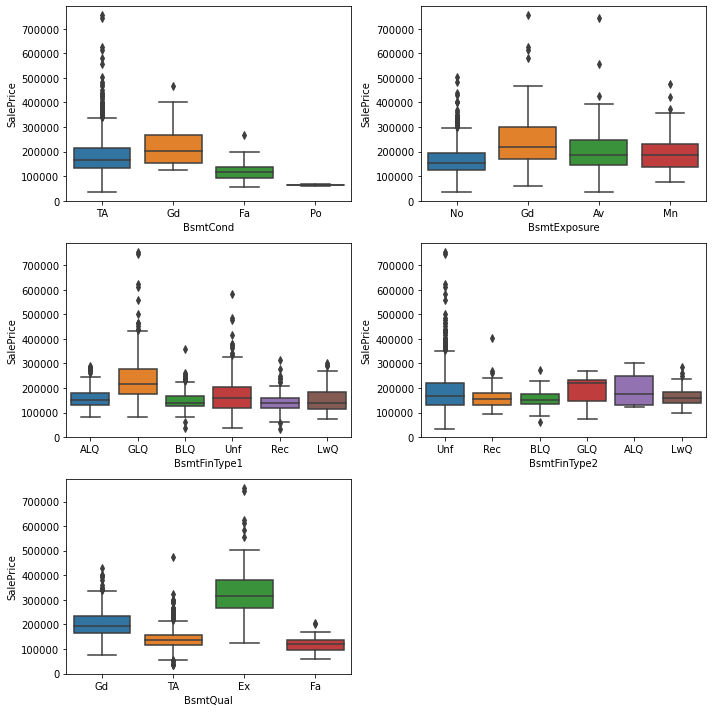

In [19]:
fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(bsmt_df[col], df['SalePrice'])
    plt.tight_layout()

Information:

- Houses with good quality Bsmt Condition, Bsmt exposure, Bsmt Furnishing have high sale price .
- Houses with Excellent Basement height have high sale price.

### Garage features

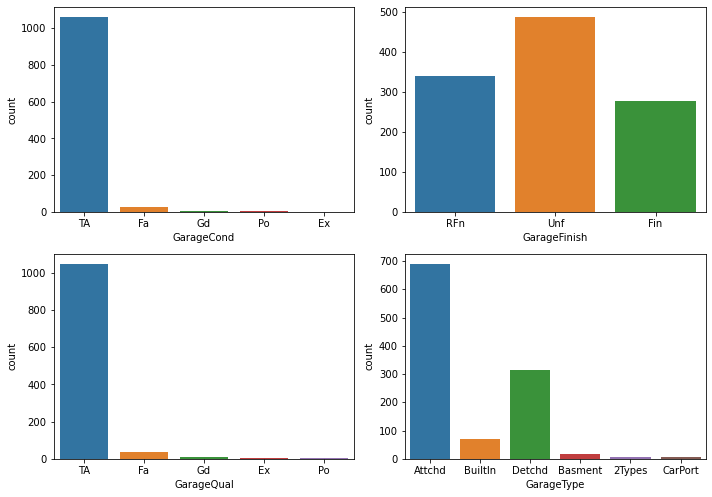

In [20]:
fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(garage_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(garage_df[col])
    plt.tight_layout()

Information:

- Garage condition, garage quality in most houses are average with unfurnished garages.
- Most houses have attached garage type followed by deattached.

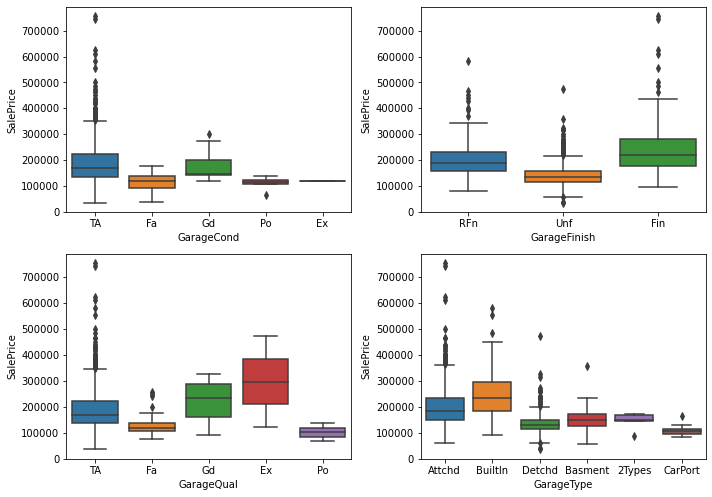

In [21]:
fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(garage_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(garage_df[col], df['SalePrice'])
    plt.tight_layout()

Information:

- Houses with good quality Bsmt Condition, Bsmt exposure, Bsmt Furnishing have high sale price .
- Houses with Excellent Basement height have high sale price.

### Sale features

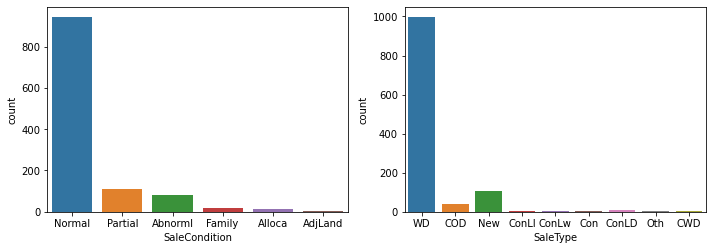

In [22]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(sale_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(sale_df[col])
    plt.tight_layout()

Information:

- Mostly houses have a normal sale condition, Sale type as WD:Warranty Deed - Conventional.

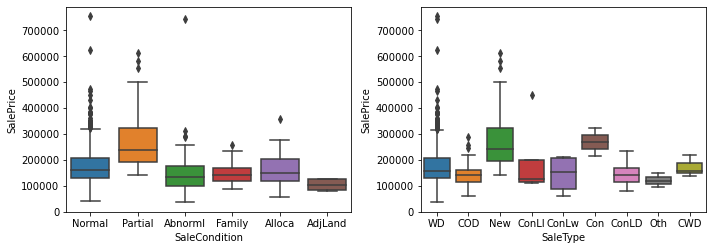

In [23]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(sale_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(sale_df[col], df['SalePrice'])
    plt.tight_layout()

Information:

- Houses with Parial sale condition (new houses) and new Sale Type have high sale price.

### Exterior features

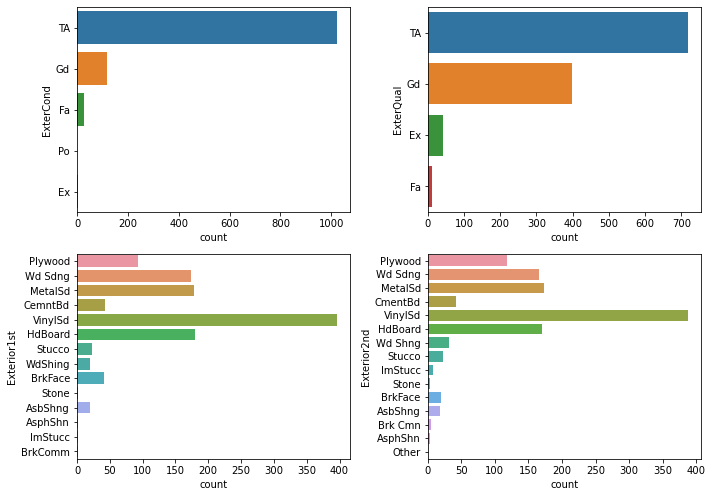

In [24]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(exterior_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=exterior_df[col])
    plt.tight_layout()

Information:

- Most houses have average exterior conditions and quality.
- Vinyl Siding is mostly used in houses

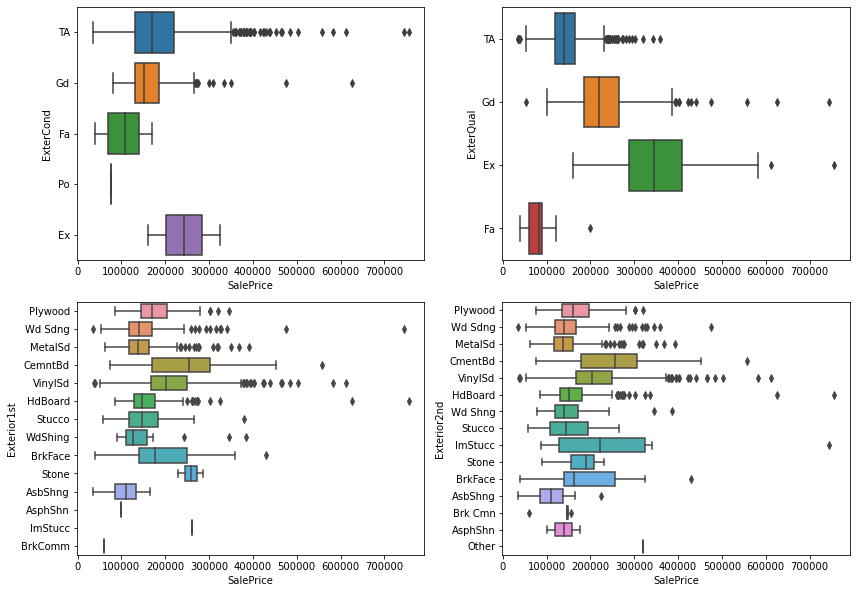

In [25]:
fig=plt.subplots(figsize=(12, 12))

for i,col in enumerate(exterior_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df['SalePrice'], exterior_df[col])
    plt.tight_layout()

Information:

- Houses having excellent exterior conditions and quality have generally higher selling price.
- Houses with Exterior covering made of Cement Board have high selling price.

### Interior features

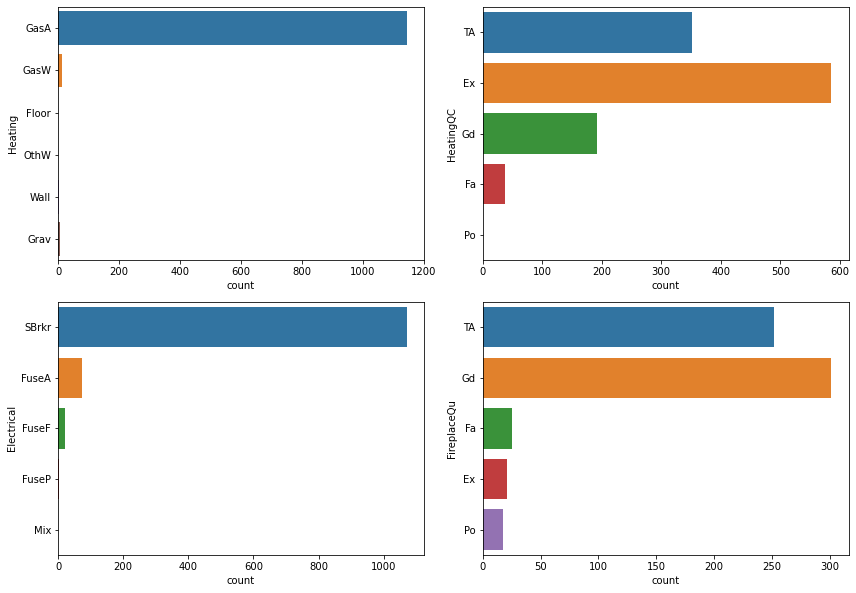

In [26]:
fig=plt.subplots(figsize=(12, 12))

for i,col in enumerate(heating_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y = heating_df[col])
    plt.tight_layout()

Information:

- Most houses have Gas forced warm air furnace and excellent heating quality with good fireplace.
- Most houses have Standard Circuit Breakers.

### Sale price

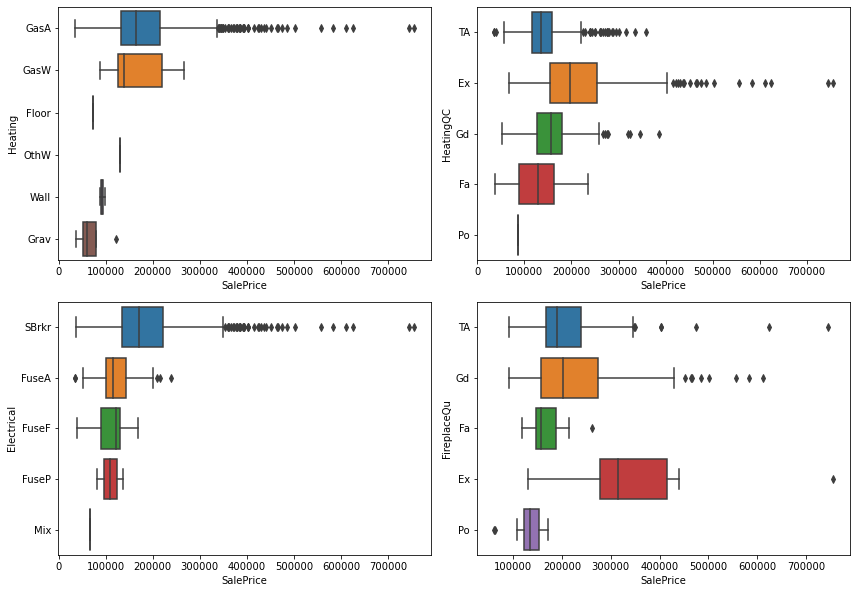

In [27]:
fig=plt.subplots(figsize=(12, 12))

for i,col in enumerate(heating_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df['SalePrice'], heating_df[col])
    plt.tight_layout()

Information:

- Houses having Gas hot water or steam heat and excellent heating quality have generally higher selling price.
- Houses having Standard Circuit Breakers, good fireplace have higher selling price.

### Land features

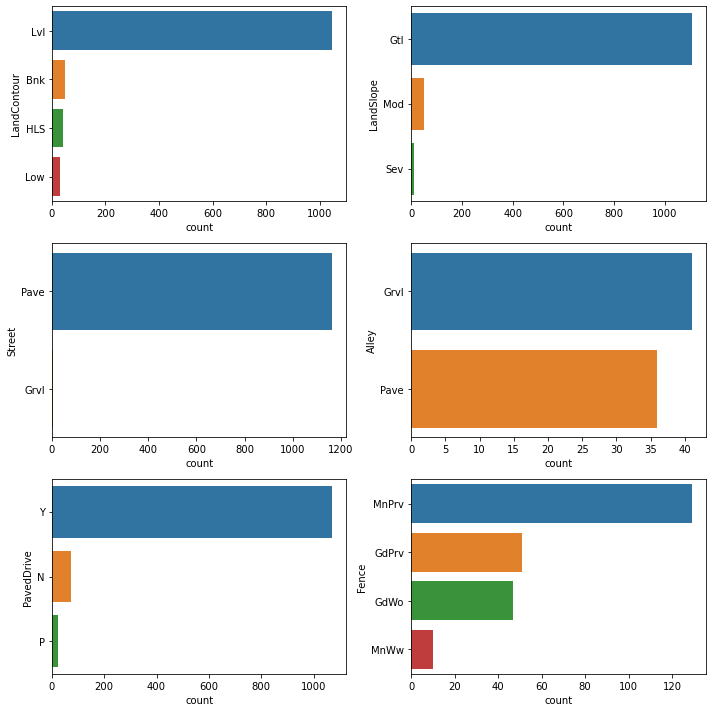

In [28]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(land_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y = land_df[col])
    plt.tight_layout()

Information:

- Most houses have level land contours with gentle land slope. Streets having pave are highly common.
- Paved drive are very common. Fences with min privacy are mostly there in houses.

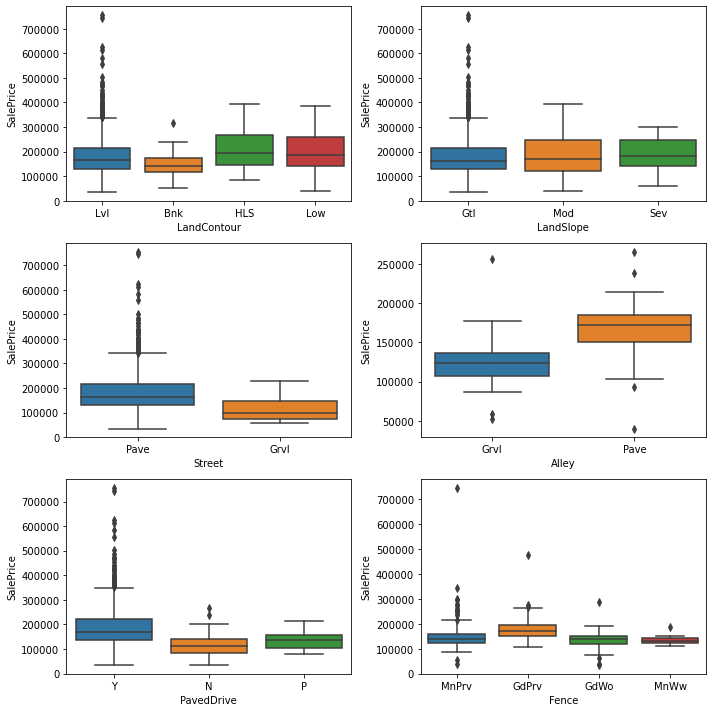

In [29]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(land_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(land_df[col], df['SalePrice'] )
    plt.tight_layout()

Information:

- Houses having level land contours and modelerate land slope have generally higher selling price.
- Houses with street having pave and alley with pave have high selling price.
- Houses having paved drive with good privacy have higher selling price.

### Rest Features

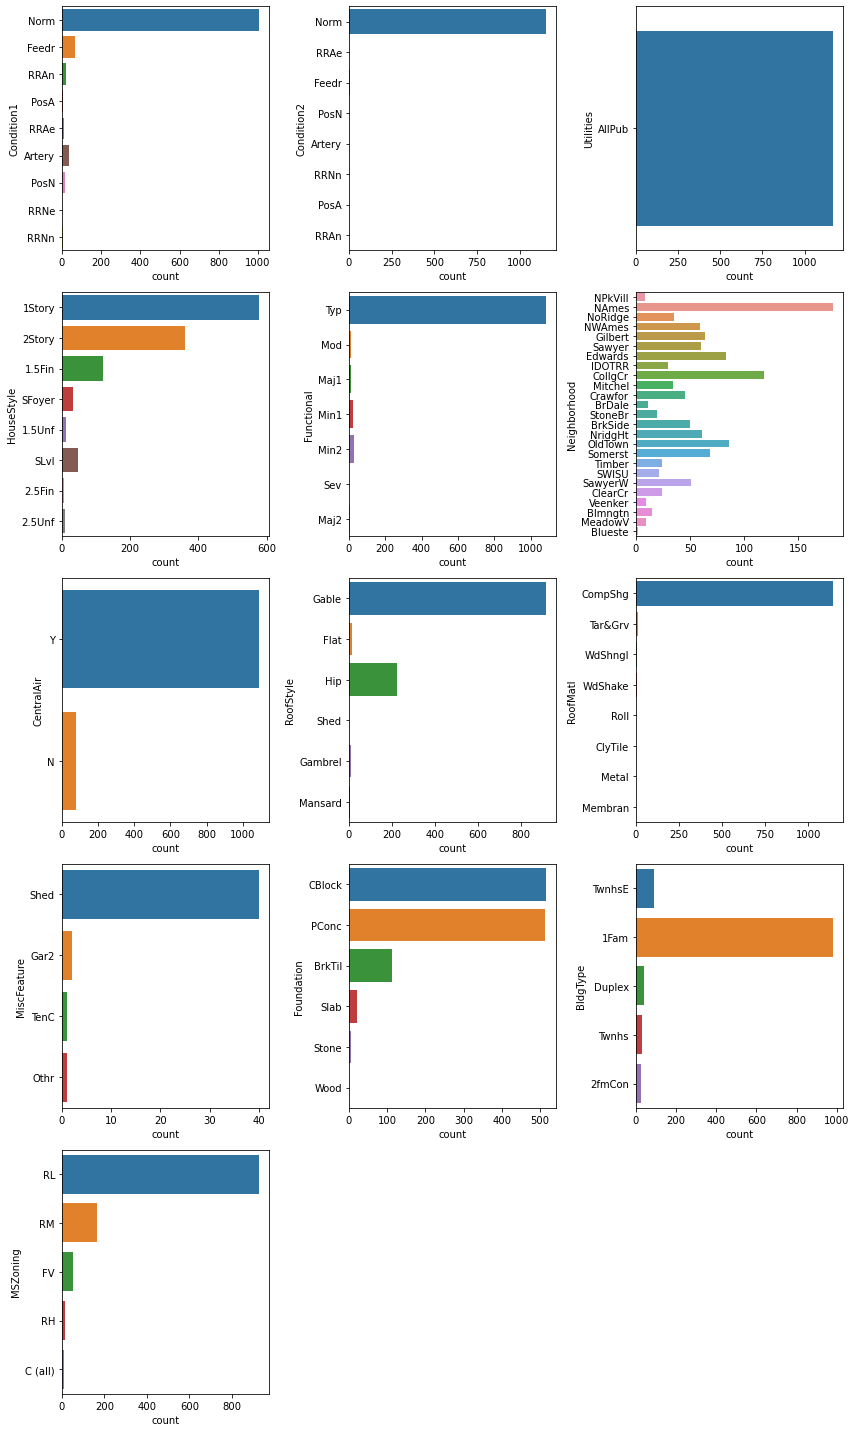

In [30]:
fig=plt.subplots(figsize=(12, 20))
feats = ['Condition1','Condition2','Utilities','HouseStyle','Functional','Neighborhood', 'CentralAir', 'RoofStyle', 'RoofMatl','MiscFeature','Foundation','BldgType','MSZoning']
for i,col in enumerate(df[feats].columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(y = df[col])
    plt.tight_layout()

Information:

- Most houses have normal conditions with All public Utilities.
- 1 story house style are most common . Most of them have central AC.
- Shed is most common misc feature in houses. Gable and CompShg are most common under roof style and matterial
- Most homes are located near Northwest Ames and College creek.

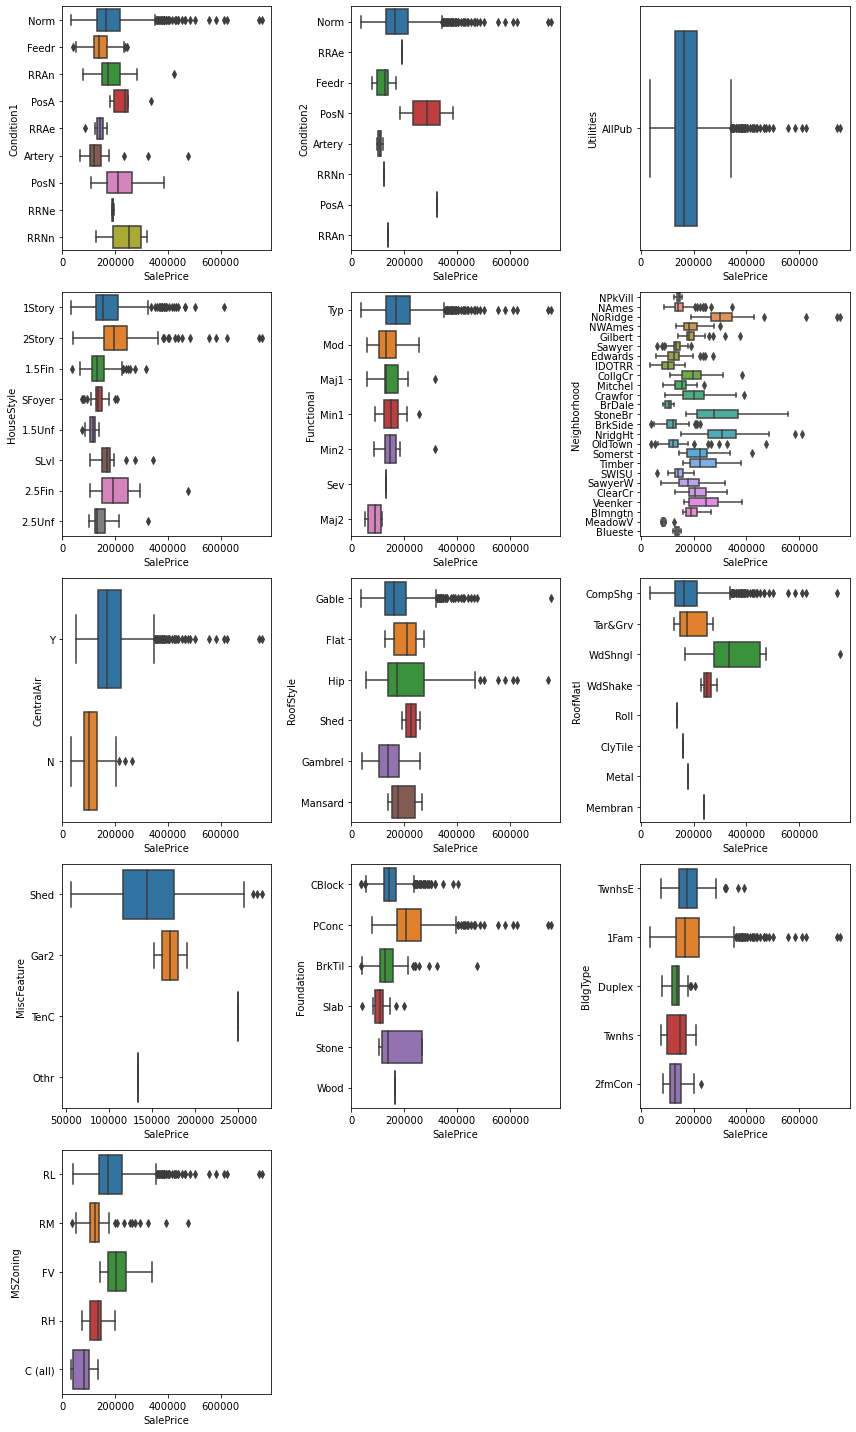

In [31]:
fig=plt.subplots(figsize=(12, 20))

for i,col in enumerate(df[feats].columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df['SalePrice'], df[col])
    plt.tight_layout()

Information:

- Houses having 2 Story with have generally higher selling price.
- Houses with central AC, hip style of roof with Wood Shingles have high selling price.
- Houses with StoneBr, NridgHt as neighbourhood have high selling price.

### Featues selections and Handling missing values

#### Removing one of the high correlated from pairs checked using heatmap

In [32]:
df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr'], axis=1, inplace=True)
print(df.columns.shape)

(76,)


#### Removing numerical features having 1 unique value as occuring more than 95%

In [33]:
# From EDA Removing numerical features having 1 unique value as occuring more than 99%
toDrop= ['BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for c in toDrop:
    if float(numeric_df[c].value_counts(1)[:1]) >= 0.99:
        df.drop(c, axis=1, inplace=True)
print(df.columns.shape)

(75,)


### Checking % of missing values

In [34]:
# Checking % of null values
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)

LotFrontage  :  18.0
Alley  :  93.0
MasVnrType  :  1.0
MasVnrArea  :  1.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
FireplaceQu  :  47.0
GarageType  :  5.0
GarageFinish  :  5.0
GarageQual  :  5.0
GarageCond  :  5.0
PoolQC  :  99.0
Fence  :  80.0
MiscFeature  :  96.0


In [35]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice
df = df[~df['MasVnrArea'].isnull()]
df.drop(['Id'], axis=1, inplace=True)

In [36]:
print(df['Electrical'].isnull().sum())

# dropping rows with null values in 'Electrical', for very low missing value count
df.dropna(subset=['Electrical'], inplace=True)

0


In [37]:
print(df['PoolQC'].value_counts())


Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


In [38]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
df.drop(['PoolQC'], axis=1, inplace=True)

In [39]:
# Some categorical features have NAN values which denotes to a particular class.
impute_cat_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(df[impute_cat_features].isnull().sum())
for feat in impute_cat_features:
    df[feat].fillna(value='NA_' + feat, inplace = True)

Alley           1085
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
FireplaceQu      548
Fence            924
MiscFeature     1117
dtype: int64


- 2 types of categorical features are present:
- Encoding For Categorical Variables Ordered Features: to be label encoded: 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

- Unordered Features: to be one hot encoded: 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle'

### Encoding Ordinal Categorical Features

In [40]:
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'NA_BsmtQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'NA_BsmtCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'NA_BsmtExposure':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA_BsmtFinType1':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA_BsmtFinType2':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'NA_GarageFinish':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'NA_GarageQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'NA_GarageCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['FireplaceQu'] = df['FireplaceQu'].map({'NA_FireplaceQu':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

Information:
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.
- All these features can be imputed by making them into one category in place of missing data.

In [41]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,NA_Alley,IR1,Lvl,AllPub,Inside,...,0,0,NA_Fence,NA_MiscFeature,0,2,15,WD,Normal,128000
1,20,RL,95.0,15865,Pave,NA_Alley,IR1,Lvl,AllPub,Inside,...,0,224,NA_Fence,NA_MiscFeature,0,10,15,WD,Normal,268000
2,60,RL,92.0,9920,Pave,NA_Alley,IR1,Lvl,AllPub,CulDSac,...,0,0,NA_Fence,NA_MiscFeature,0,6,15,WD,Normal,269790
3,20,RL,105.0,11751,Pave,NA_Alley,IR1,Lvl,AllPub,Inside,...,0,0,MnPrv,NA_MiscFeature,0,1,12,COD,Normal,190000
4,20,RL,NaN,16635,Pave,NA_Alley,IR1,Lvl,AllPub,FR2,...,0,0,NA_Fence,NA_MiscFeature,0,6,13,WD,Normal,215000


### Encoding on Nominal features

In [42]:
# One Hot Encoding on Nominal features
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical', 'GarageType','PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition','LotShape',
                      'Utilities', 'LandSlope', 'HouseStyle', 'CentralAir', 'Functional']
dummy_df = pd.get_dummies(df[unordered_features], drop_first=True)

In [43]:
dummy_df.shape

(1161, 161)

In [44]:
dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA_Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [45]:
# Dropping those classes which are present less than/equal to 1% of the observations.
dummy_cols_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.98:
        dummy_cols_drop.append(feat)
    elif dummy_df[feat].value_counts()[1]/dummy_df.shape[1] >= 0.98:
        dummy_cols_drop.append(feat)
        
print(dummy_cols_drop)
print(len(dummy_cols_drop))

['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NA_Alley', 'LandContour_Lvl', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',

In [46]:
dummy_df.drop(columns = dummy_cols_drop, axis = 1, inplace = True)
dummy_df.shape

(1161, 47)

In [47]:
# Adding the dummy variables to the original dataframe
df = pd.concat([df,dummy_df],axis=1)

In [48]:
# Dropping the redundant columns
df = df.drop(unordered_features,axis=1)

In [49]:
df.shape

(1161, 91)

In [50]:
X = df.drop('SalePrice', axis = 1)

In [51]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
0,120,NaN,4928,6,5,46,46,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1,20,95.0,15865,8,6,52,52,0.0,3,3,...,0,0,0,0,0,1,0,0,0,0
2,60,92.0,9920,7,5,26,25,0.0,3,2,...,0,0,0,0,0,0,0,0,0,0
3,20,105.0,11751,6,6,45,45,480.0,2,2,...,1,0,0,0,0,0,0,0,0,0
4,20,NaN,16635,6,7,45,22,126.0,3,2,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y = df['SalePrice']
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

1.956815336199932


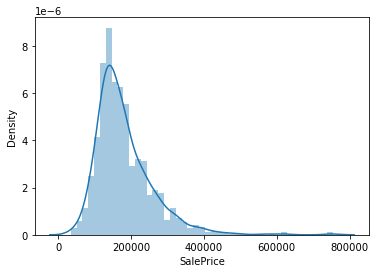

In [53]:
sns.distplot(y)
print(y.skew())

### Log transformation to removing skewness

In [54]:
y_bc = np.log(y)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

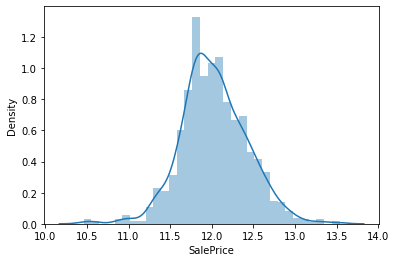

In [55]:
sns.distplot(np.log(y))

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y_bc, test_size = 0.2, shuffle = True, random_state=100)

In [57]:
X_train.shape

(928, 90)

In [58]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
761,20,80.0,9600,6,6,64,34,183.0,2,2,...,1,0,0,0,0,0,0,0,1,0
1028,20,105.0,11249,6,5,27,27,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
223,80,NaN,7750,7,5,22,22,0.0,2,2,...,0,0,0,0,0,0,0,1,0,0
380,60,NaN,13700,7,6,57,34,288.0,2,2,...,0,0,0,0,0,0,0,0,0,0
335,20,79.0,9416,7,5,15,15,205.0,4,2,...,0,0,1,1,0,0,0,0,0,0


In [59]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
761,20,80.0,9600,6,6,64,34,183.0,2,2,...,1,0,0,0,0,0,0,0,1,0
1028,20,105.0,11249,6,5,27,27,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
223,80,NaN,7750,7,5,22,22,0.0,2,2,...,0,0,0,0,0,0,0,1,0,0
380,60,NaN,13700,7,6,57,34,288.0,2,2,...,0,0,0,0,0,0,0,0,0,0
335,20,79.0,9416,7,5,15,15,205.0,4,2,...,0,0,1,1,0,0,0,0,0,0


### Outlier Treatment

In [60]:
# Checking presence of outliers
outliers_percentage={}
numeric_df = X_train.select_dtypes(include=['int64', 'float64'])
cols = ['SalePrice','YearBuilt','OverallCond', 'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 
           'FullBath', 'MoSold', 'Yrsold', 'BsmtQual', 'ExterCond','BsmtExposure', 'BsmtFinType2','BsmtCond',
            'TotRmsAbvGrd','GarageCond','GarageQual', 'KitchenAbvGr', 'LowQualFinSF','Fireplaces']
for feature in numeric_df.columns:
    if feature not in cols:
        IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
        outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)

outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
19,EnclosedPorch,13.90
8,BsmtFinSF2,12.07
21,ScreenPorch,8.73
4,MasVnrArea,7.33
0,MSSubClass,7.00
1,LotFrontage,5.93
2,LotArea,5.17
18,OpenPorchSF,4.53
22,MiscVal,3.77
17,WoodDeckSF,2.26


In [61]:
# Outlier Treatment
for feature, percent in outliers_percentage.items():
    if percent > 0:
        IQR = X_train[feature].quantile(.75) - X_train[feature].quantile(.25) 
        max_value = X_train[feature].quantile(.75)+1.5*IQR
        min_value = X_train[feature].quantile(.25)-1.5*IQR
        print(feature, IQR, min_value, max_value)
        X_train[feature][X_train[feature] > max_value] = max_value
        X_train[feature][X_train[feature] < min_value ] = min_value
        X_test[feature][X_test[feature] > max_value] = max_value
        X_test[feature][X_test[feature] < min_value ] = min_value

MSSubClass 50.0 -55.0 145.0
LotFrontage 20.0 30.0 110.0
LotArea 4018.5 1562.25 17636.25
MasVnrArea 145.5 -218.25 363.75
BsmtFinSF1 713.25 -1069.875 1783.125
BsmtFinSF2 0.0 0.0 0.0
BsmtUnfSF 592.75 -689.625 1681.375
1stFlrSF 500.5 141.25 2143.25
2ndFlrSF 705.25 -1057.875 1763.125
GarageArea 238.0 -19.0 933.0
WoodDeckSF 168.0 -252.0 420.0
OpenPorchSF 69.25 -103.875 173.125
EnclosedPorch 0.0 0.0 0.0
3SsnPorch 0.0 0.0 0.0
ScreenPorch 0.0 0.0 0.0
MiscVal 0.0 0.0 0.0


Information:

- Many features have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this. Some other features are also excluded since those are ordered categorical type which are labelled encoded to numeric form.

In [62]:
#  Checking Null values
def null_values(dataf):
    for feat in dataf.columns:
        if dataf[feat].isnull().any():
            print(feat+" : "+str(dataf[feat].isnull().sum()))

In [63]:
null_values(X_train)
print("-----")
null_values(X_test)

LotFrontage : 173
-----
LotFrontage : 39


In [64]:
X_train['LotFrontage'].dtype

dtype('float64')

In [65]:
# Imputing missing values with mean of train data since outliers are already removed. 
imputed_value = np.mean(X_train['LotFrontage'])
print("Mean : ",imputed_value)
X_train['LotFrontage'].fillna(imputed_value, inplace = True)
X_test['LotFrontage'].fillna(imputed_value, inplace = True)

Mean :  69.83973509933774


In [66]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
761,20,80.000000,9600.0,6,6,64,34,183.0,2,2,...,1,0,0,0,0,0,0,0,1,0
1028,20,105.000000,11249.0,6,5,27,27,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
223,80,69.839735,7750.0,7,5,22,22,0.0,2,2,...,0,0,0,0,0,0,0,1,0,0
380,60,69.839735,13700.0,7,6,57,34,288.0,2,2,...,0,0,0,0,0,0,0,0,0,0
335,20,79.000000,9416.0,7,5,15,15,205.0,4,2,...,0,0,1,1,0,0,0,0,0,0


In [67]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
899,90,60.000000,8544.0,3,4,72,72,0.00,2,2,...,0,0,0,0,0,0,0,0,0,0
498,20,74.000000,8892.0,5,7,69,26,0.00,3,2,...,0,0,0,0,0,0,0,0,0,0
140,60,98.000000,12203.0,8,5,24,23,363.75,3,2,...,0,0,0,0,0,0,0,0,0,0
644,90,64.000000,7018.0,5,5,43,43,275.00,2,2,...,0,0,0,0,0,0,1,0,0,0
925,60,69.839735,14541.0,8,7,29,29,0.00,3,3,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [68]:
sscaler = StandardScaler()
sscaler.fit(X_train)
X_train_sc = pd.DataFrame(data=sscaler.transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(data=sscaler.transform(X_test), columns=X_test.columns)

In [69]:
# Folds for GridSearchCV
folds = KFold(n_splits = 4)

### Modelling, hyperparams tuning for ridge and lasso, evalution

In [70]:
def ModelTrainAndEvaluaion(model, params):
    model_cv = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              scoring= 'r2', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            
    model_cv.fit(X_train_sc, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_

    final_model.fit(X_train_sc, y_train)
    y_train_pred = final_model.predict(X_train_sc)
    y_test_pred = final_model.predict(X_test_sc)
    
    # Model Evaluation
    print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
    print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
    print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
    print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
    fig, axes = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle('Assumtions of Linear Regression')
    sns.distplot(y_train -  y_train_pred, ax = axes[0])
    axes[0].set_title('Distribution of Residuals')
    sns.scatterplot(y_train_pred ,y_train, ax = axes[1])  
    axes[1].set_title('Plot of y vs y_predicted')
    sns.scatterplot(X_train.index, y_train-y_train_pred, ax = axes[2])
    axes[2].set_title('Homoscedasticity/ Variance')
    plt.tight_layout()
    
    cv_results = pd.DataFrame(model_cv.cv_results_)
    # plotting mean test and train scores with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

    # plotting
    fig = plt.figure(figsize=(7,3))
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('r2')

    plt.title("r2 and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()
    return final_model

Fitting 4 folds for each of 29 candidates, totalling 116 fits
Optimum alpha for Ridge() is 60.000000
R2 score (train) :  0.896
R2 score (test) :  0.9149
RMSE (train) :  0.1289
RMSE (test) :  0.1122


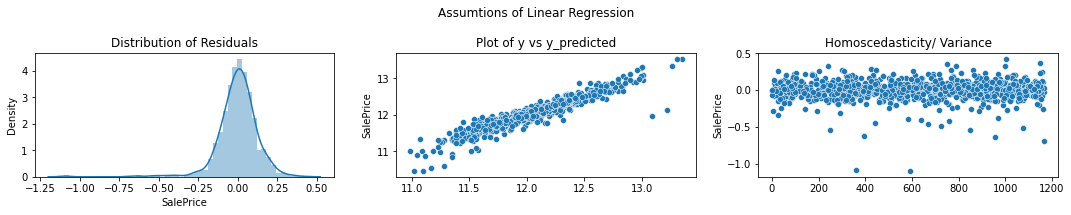

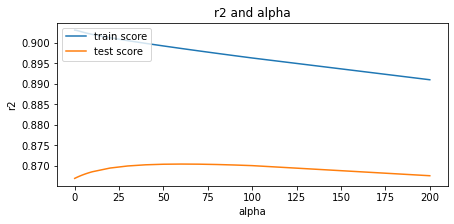

In [71]:
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                        9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}
ridge = ModelTrainAndEvaluaion(Ridge(), params)

In [72]:
# Satisfying all the assumption of Linear Regression

Fitting 4 folds for each of 11 candidates, totalling 44 fits
Optimum alpha for Lasso() is 0.002500
R2 score (train) :  0.8953
R2 score (test) :  0.9158
RMSE (train) :  0.1293
RMSE (test) :  0.1116


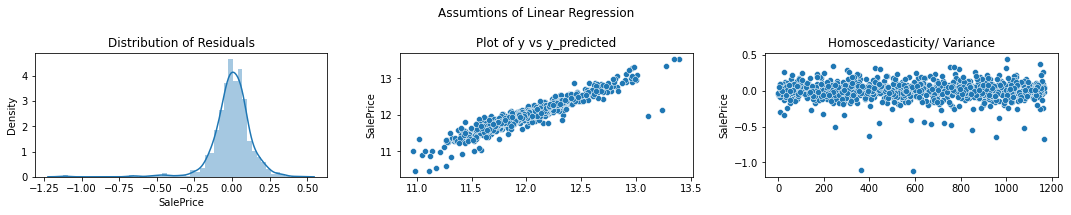

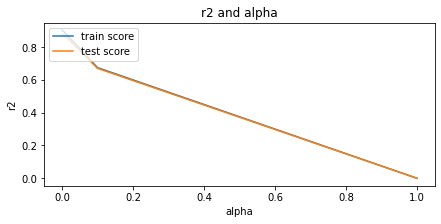

In [73]:
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}
lasso = ModelTrainAndEvaluaion(Lasso(), params)

In [74]:
# Satisfying all the assumption of Linear Regression

### Comparing Model Coefficients

In [75]:
model_coefficients = pd.DataFrame(index=X_test_sc.columns)
model_coefficients.rows = X_test_sc.columns

model_coefficients['Ridge'] = ridge.coef_
model_coefficients['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
print(len(model_coefficients))
model_coefficients

90


,Ridge,Lasso
MSSubClass,-0.003302,-0.000233
LotFrontage,0.007687,0.003987
LotArea,0.021915,0.023102
OverallQual,0.076112,0.090380
OverallCond,0.040682,0.043255
YearBuilt,-0.035804,-0.043055
YearRemodAdd,-0.017022,-0.011715
MasVnrArea,0.000969,0.000000
ExterQual,0.002538,0.000000
ExterCond,-0.001780,-0.000000


### Final Model

In [76]:
# Features for final model. Choosing Lasso since it gives better r2 score and less RMSE.
print("Total no of features : ", model_coefficients[model_coefficients['Lasso']!=0][['Lasso']].shape[0])
model_coef = model_coefficients[model_coefficients['Lasso']!=0][['Lasso']].sort_values(by='Lasso', ascending=False, key=abs)
model_coef

Total no of features :  57


,Lasso
1stFlrSF,0.102822
OverallQual,0.090380
2ndFlrSF,0.069778
OverallCond,0.043255
YearBuilt,-0.043055
GarageArea,0.031318
Neighborhood_IDOTRR,-0.028366
LotArea,0.023102
BsmtFinSF1,0.022836
Neighborhood_Crawfor,0.022356


In [77]:
# Top 10 features
TOP_10 = model_coef[:10]
TOP_10

,Lasso
1stFlrSF,0.102822
OverallQual,0.090380
2ndFlrSF,0.069778
OverallCond,0.043255
YearBuilt,-0.043055
GarageArea,0.031318
Neighborhood_IDOTRR,-0.028366
LotArea,0.023102
BsmtFinSF1,0.022836
Neighborhood_Crawfor,0.022356


In [78]:
# Predicted values of Dependent feature (Sale Price)
y_prediction = lasso.predict(X_test_sc)
y_test_pred_invbc = np.exp(y_prediction)
y_test_pred_invbc[:5]

array([ 87683.21201629, 122071.81066899, 328271.13925843, 137125.73003864,
       365982.52410194])

### Model Building with doubling the value of lambda

In [79]:
# Model Building
ridge_model = Ridge(alpha=60)
ridge_model.fit(X_train_sc, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_sc)
y_test_pred = ridge_model.predict(X_test_sc)

print("Model Evaluation :")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation :
R2 score (train) :  0.896
R2 score (test) :  0.9149
RMSE (train) :  0.1289
RMSE (test) :  0.1122


In [80]:
# Model Building
lasso_model = Lasso(alpha=0.0025)
lasso_model.fit(X_train_sc, y_train)

# Predicting
y_train_pred = lasso_model.predict(X_train_sc)
y_test_pred = lasso_model.predict(X_test_sc)

print("Model Evaluation :")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation :
R2 score (train) :  0.8953
R2 score (test) :  0.9158
RMSE (train) :  0.1293
RMSE (test) :  0.1116


In [81]:
model_coefficients = pd.DataFrame(index=X_test_sc.columns)
model_coefficients.rows = X_test_sc.columns

model_coefficients['Ridge_double'] = ridge_model.coef_
model_coefficients['Lasso_double'] = lasso_model.coef_
model_coefficients['Ridge'] = ridge.coef_
model_coefficients['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)

In [82]:
model_coef = model_coefficients[model_coefficients['Lasso']!=0].sort_values(by='Lasso', ascending=False, key=abs)
model_coef

,Ridge_double,Lasso_double,Ridge,Lasso
1stFlrSF,0.077237,0.102822,0.077237,0.102822
OverallQual,0.076112,0.090380,0.076112,0.090380
2ndFlrSF,0.049618,0.069778,0.049618,0.069778
OverallCond,0.040682,0.043255,0.040682,0.043255
YearBuilt,-0.035804,-0.043055,-0.035804,-0.043055
GarageArea,0.029458,0.031318,0.029458,0.031318
Neighborhood_IDOTRR,-0.030779,-0.028366,-0.030779,-0.028366
LotArea,0.021915,0.023102,0.021915,0.023102
BsmtFinSF1,0.029626,0.022836,0.029626,0.022836
Neighborhood_Crawfor,0.023307,0.022356,0.023307,0.022356


In [83]:
# Top 5 features 
model_coef[:5]

,Ridge_double,Lasso_double,Ridge,Lasso
1stFlrSF,0.077237,0.102822,0.077237,0.102822
OverallQual,0.076112,0.090380,0.076112,0.090380
2ndFlrSF,0.049618,0.069778,0.049618,0.069778
OverallCond,0.040682,0.043255,0.040682,0.043255
YearBuilt,-0.035804,-0.043055,-0.035804,-0.043055


### Removing top 5 features

In [84]:
# Model Building
X_train_r = X_train_sc.drop(['1stFlrSF','2ndFlrSF','OverallQual','YearBuilt','OverallCond'], axis = 1)
X_test_r = X_test_sc.drop(['1stFlrSF','2ndFlrSF','OverallQual','YearBuilt','OverallCond'], axis = 1)

lasso_model = Lasso(alpha=0.00125)
lasso_model.fit(X_train_r, y_train)

# Predicting
y_train_pred = lasso_model.predict(X_train_r)
y_test_pred = lasso_model.predict(X_test_r)

print("Model Evaluation :")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation :
R2 score (train) :  0.8626
R2 score (test) :  0.88
RMSE (train) :  0.1481
RMSE (test) :  0.1332


In [85]:
model_coefficients_r = pd.DataFrame(index=X_test_r.columns)
model_coefficients_r.rows = X_test_r.columns
model_coefficients_r['Lasso_R'] = lasso_model.coef_

In [86]:
model_coefficients_r.sort_values(by='Lasso_R', ascending=False, key=abs )[:5]

,Lasso_R
BsmtFinSF1,0.068460
TotRmsAbvGrd,0.064261
FullBath,0.059113
GarageArea,0.042939
YearRemodAdd,-0.042913
